---
title: 10.3 梯度下降
date: 2024-7-26 12:00:00
tags: [机器学习,pytorch]
categories: [机器学习]
comment: true
toc: true
---
#  
<!--more-->
# 3 梯度下降

## 3.1 一维梯度下降

- 对连续可微实函数f利用泰勒展开：
$$ f ( x + \epsilon ) = f ( x ) + \epsilon f ' ( x ) + O ( \epsilon ^ 2 ) $$

- 在一阶近似中， $f ( x + \epsilon ) $可用f(x)和f'(x)来近似.

- 令$\epsilon = - \eta f ' ( x )$，其中$\eta$是学习率，那么有：
$$ f ( x - \eta f ' ( x ) ) = f ( x ) - \eta f^ {'2} ( x )  + O ( \eta ^ 2 ) $$
$$ f ( x - \eta f ' ( x ) ) \leq f ( x ) $$

- 用$x - \eta f ' ( x )$来代替$x$，可以使得函数值下降:
$$ f ( x ) \geq f ( x - \eta f ' ( x ) ) \geq f ( x - 2 \eta f ' ( x ) ) \geq f ( x - 3 \eta f ' ( x ) ) \geq \cdots $$

epoch 10, x: 0.06046617599999997


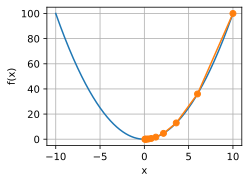

In [3]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

def f(x): #目标函数
    return x ** 2

def f_grad(x): #导函数
    return 2*x

# x0=10, η=0.2, 使用梯度下降法迭代10次，x值逼近最优解
def gd( eta, f_grad):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results
results = gd(0.2, f_grad)

def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-','-o'])
show_trace(results, f)

### 3.1.1 学习率

- 如果学习率太小，x更新缓慢
- 如果学习率太大，$ | \eta f ' ( x ) | $可能对于一阶泰勒展开式太大，即式子中的$O ( \eta ^ 2 f^ {'2} ( x ) )$项不能忽略不计.

epoch 10, x: 61.917364224000096


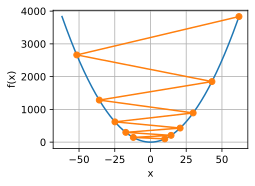

In [4]:
show_trace(gd(1.1, f_grad), f)